This file is for the Kaggle competition "Predict CO2 Emissions in Rwanda" The due date is Aug 21, 2023 for official competition.

Source of the Kaggle Comp is: https://www.kaggle.com/competitions/playground-series-s3e20/data

Goal: Predict CO2 emissions from 2022 to 2022 Nov

In [2]:
import pandas as pd
import zipfile
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [3]:
zf = zipfile.ZipFile("Data/playground-series-s3e20.zip")

In [4]:
zf.namelist()

['sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
df_train = pd.read_csv(zf.open("train.csv"))
df_test = pd.read_csv(zf.open("test.csv"))

In [6]:
df_train.sample(5)
df_train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [7]:
df_train.sample(5)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
42092,ID_-1.938_31.362_2021_10,-1.938,31.362,2021,10,-0.000116,0.725534,-0.000084,0.031755,72.891815,...,6148.485911,58900.742407,5148.485916,10.087589,0.181290,-75.473695,39.411822,-95.597412,22.960282,0.268134
16672,ID_-1.211_30.389_2021_30,-1.211,30.389,2021,30,0.000079,0.549996,0.000041,0.000000,-57.141763,...,3922.791842,70923.264004,2922.791907,35.262745,0.226106,-41.297061,55.961226,-46.858387,31.738865,120.232750
74962,ID_-2.958_29.442_2020_20,-2.958,29.442,2020,20,0.000015,1.058855,0.000022,0.187364,-99.321269,...,3564.260086,73512.869411,2738.927499,14.220350,0.321161,-12.431387,46.199991,-43.207090,33.606350,51.650530
72231,ID_-2.860_28.740_2019_45,-2.860,28.740,2019,45,0.000030,0.917139,-0.000004,0.100351,-12.157536,...,8213.974512,42368.263672,7213.974609,29.937220,0.267368,4.723529,46.585664,-124.313683,29.976699,178.348420
45580,ID_-2.055_30.845_2021_00,-2.055,30.845,2021,0,NaN,NaN,NaN,NaN,NaN,...,7006.540234,49427.960480,6006.540275,51.230130,0.297432,72.932738,53.210629,-148.637788,24.791567,8.556310


In [8]:
df_test.sample(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
11822,ID_-1.861_30.939_2022_13,-1.861,30.939,2022,13,0.000119,0.614517,0.000074,0.202426,-100.996971,...,51628.470969,5848.117249,58457.450355,4848.117187,13.844050,0.274901,-36.402413,37.168760,-74.447079,24.079944
18365,ID_-2.479_29.421_2022_39,-2.479,29.421,2022,39,0.000214,0.787004,0.000178,0.175220,39.862010,...,53057.403952,5703.013099,59848.704887,4704.558678,43.435498,0.286110,-0.003042,34.459652,-90.043124,24.876792
13391,ID_-1.978_31.122_2022_14,-1.978,31.122,2022,14,0.000225,0.800589,0.000177,0.125226,32.446927,...,50147.683792,6233.734465,56805.247979,5233.734300,18.201630,0.256885,-30.455035,42.679933,-67.584485,24.691392
15598,ID_-2.185_30.515_2022_16,-2.185,30.515,2022,16,NaN,NaN,NaN,NaN,NaN,...,53810.480469,5555.543492,60761.155692,4557.265677,10.993377,0.281407,-24.658985,42.051076,-59.071295,28.608393
1472,ID_-0.859_30.441_2022_02,-0.859,30.441,2022,2,0.000076,1.005404,0.000113,0.214921,-11.456381,...,40768.073116,7949.800964,46059.082969,6992.085141,10.474059,0.324574,24.346391,43.094225,-143.061399,27.600226


In [11]:
df_train['Location'] = df_train['latitude'] * df_train['longitude']

<Axes: xlabel='Location', ylabel='emission'>

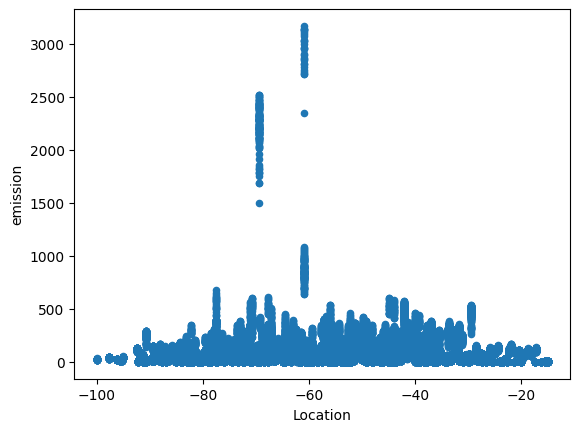

In [15]:
df_train.plot(x="Location", y ="emission", kind ="scatter" )

In [16]:
df_train.dtypes

ID_LAT_LON_YEAR_WEEK          object
latitude                     float64
longitude                    float64
year                           int64
week_no                        int64
                              ...   
Cloud_sensor_zenith_angle    float64
Cloud_solar_azimuth_angle    float64
Cloud_solar_zenith_angle     float64
emission                     float64
Location                     float64
Length: 77, dtype: object

<Axes: xlabel='week_no'>

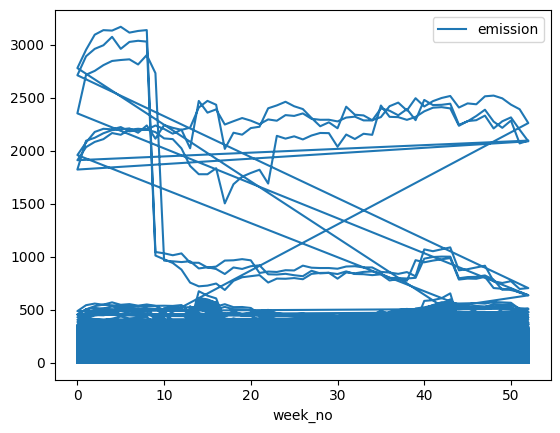

In [17]:
df_train.plot(x="week_no", y ="emission", kind = 'line')

In [18]:
df_train.dropna()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location
155,ID_-0.510_29.290_2021_49,-0.510,29.290,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,...,66195.733910,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898,-14.937900
451,ID_-0.547_29.653_2021_27,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,...,73589.759158,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903,-16.220191
453,ID_-0.547_29.653_2021_29,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,...,77346.158934,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023,-16.220191
474,ID_-0.547_29.653_2021_50,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,...,56446.041636,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269,-16.220191
1112,ID_-0.615_30.885_2021_52,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,...,65507.318464,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446,-18.994275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78045,ID_-3.136_30.364_2021_29,-3.136,30.364,2021,29,-0.000041,0.560384,-0.000017,0.028559,4.671381,...,75745.985749,2397.274872,6.929006,0.189645,-30.680727,53.829194,-38.467197,32.124882,15.915551,-95.221504
78203,ID_-3.138_30.662_2021_28,-3.138,30.662,2021,28,-0.000296,0.582466,-0.000162,0.083189,74.629140,...,66259.879395,3789.424594,6.820494,0.179993,-41.721972,36.694905,-41.679800,33.989014,22.860306,-96.217356
78205,ID_-3.138_30.662_2021_30,-3.138,30.662,2021,30,-0.000177,0.636178,-0.000094,0.085995,-50.365193,...,74489.621613,2596.923233,5.897749,0.177577,-13.445917,47.642659,-38.895209,29.898948,22.815990,-96.217356
78216,ID_-3.138_30.662_2021_41,-3.138,30.662,2021,41,0.000056,0.694221,0.000039,0.000000,75.047003,...,54486.457256,5428.729056,9.640017,0.233593,-13.485498,43.845330,-102.903782,25.609043,25.353760,-96.217356


In [26]:
#Bringing the week of Year and year together

#df_train["ToY"] = pd.concat(df_train["week_no"] + ' ' + df_train["year"])
df_train["ToY"] = [str(x) + ' ' + y for x, y in zip(df_train["week_no"].astype(str), df_train["year"].astype(str))]
df_train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,ToY
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,-14.937900,0 2019
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,-14.937900,1 2019
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,-14.937900,2 2019
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,-14.937900,3 2019
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,-14.937900,4 2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,-99.962999,48 2021
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,-99.962999,49 2021
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,-99.962999,50 2021
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,-99.962999,51 2021


<Axes: xlabel='ToY'>

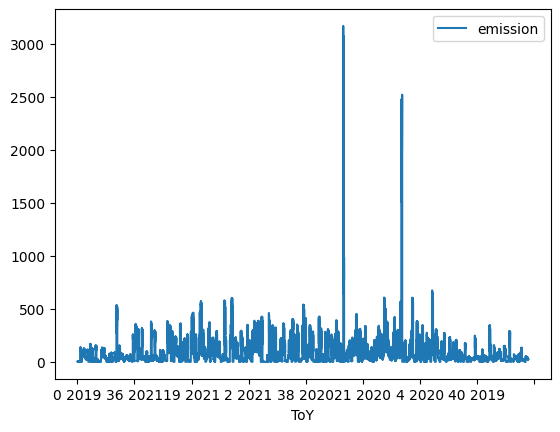

In [25]:
df_train.plot(x="ToY", y ="emission", kind = 'line')